# Notebook 08: Cross-Market Comparison

Compare Ames (USA) vs Malaysia models side-by-side.\
Analyze the impact of data quality on model performance.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')
import random
random.seed(42)

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Load Saved Metrics

In [ ]:
# Load the metrics from CSV
metrics_df = pd.read_csv('results/model_metrics.csv')

print("Model Performance Metrics:")
print(metrics_df.to_string(index=False))

Model Performance Metrics:
 Dataset         Model  R2_Score          RMSE           MAE
    Ames         Lasso  0.828413  25261.328220  14652.129770
    Ames Random Forest  0.889142  20304.754739  14035.088131
    Ames       XGBoost  0.906657  18631.823958  12864.223633
Malaysia         Lasso  0.320025 170804.517528 126424.887167
Malaysia Random Forest  0.371423 164222.355872 118821.442701
Malaysia       XGBoost  0.427060 156786.100547 114488.230448


## Visualize Model Performance by Dataset

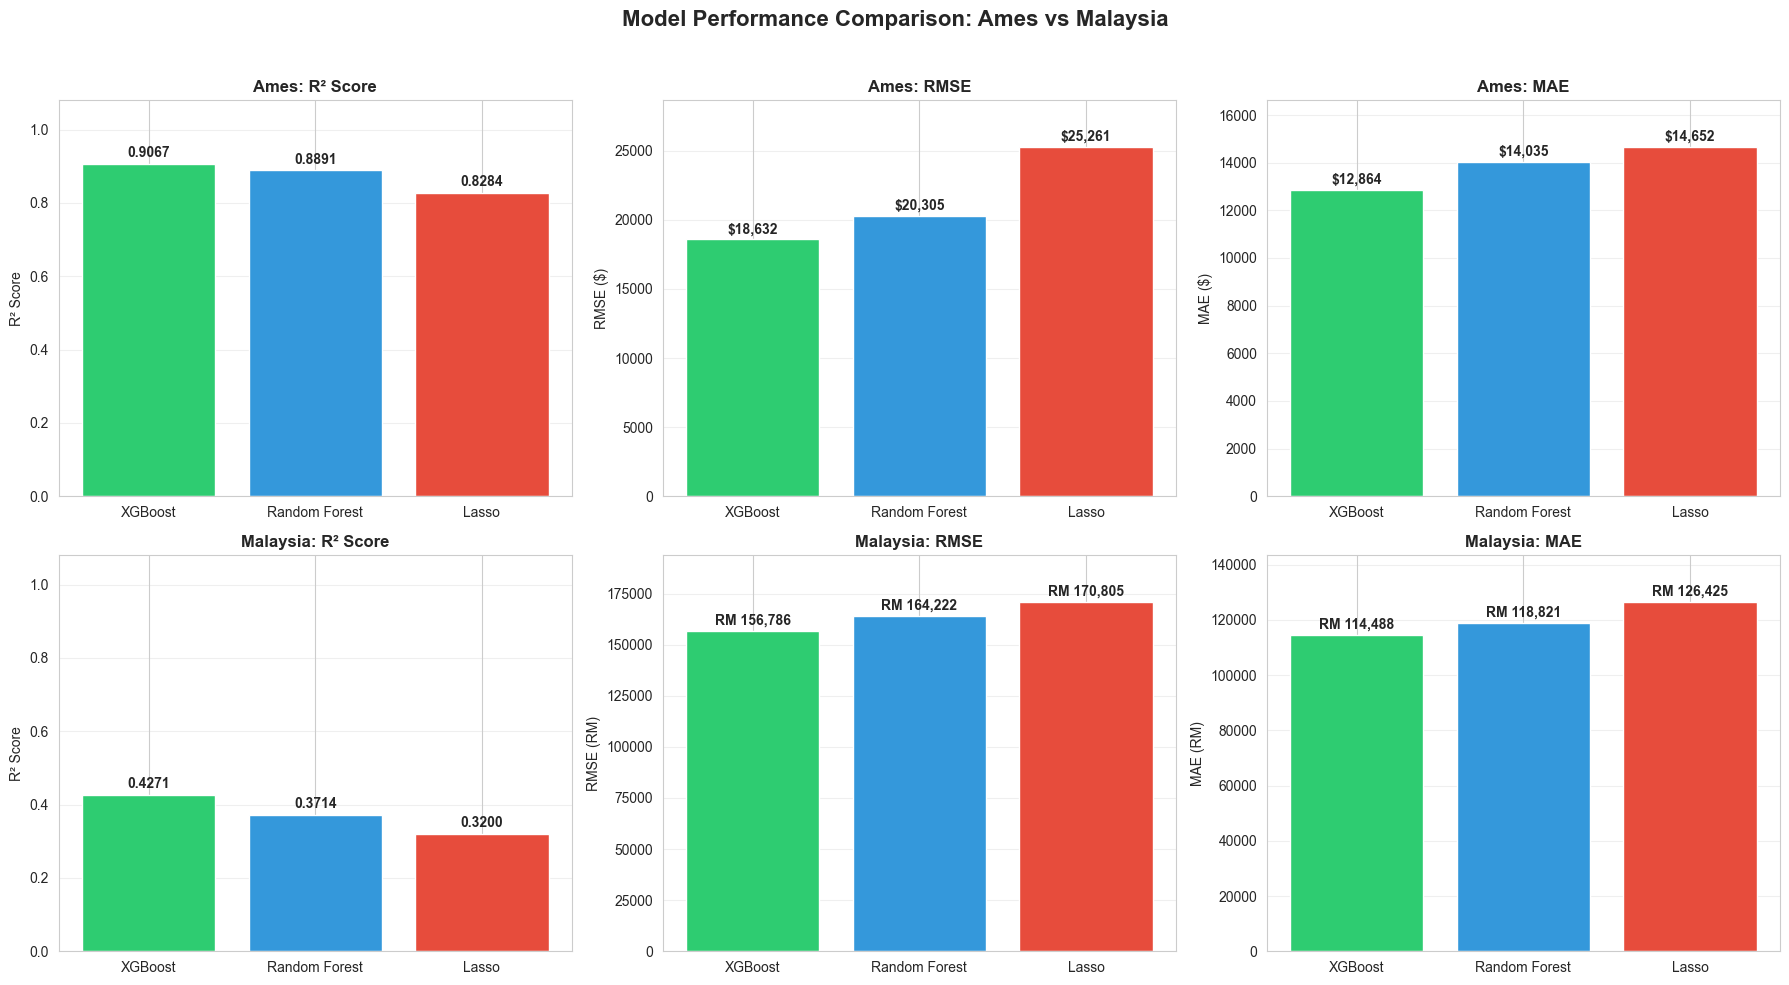

In [20]:
# Create figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Model Performance Comparison: Ames vs Malaysia', fontsize=16, fontweight='bold')

# Separate data by dataset
ames_metrics = metrics_df[metrics_df['Dataset'] == 'Ames'].copy()
malaysia_metrics = metrics_df[metrics_df['Dataset'] == 'Malaysia'].copy()

# Sort by R2 score for better visualization
ames_metrics = ames_metrics.sort_values('R2_Score', ascending=False)
malaysia_metrics = malaysia_metrics.sort_values('R2_Score', ascending=False)

colors = ['#2ecc71', '#3498db', '#e74c3c']

def annotate_bars(ax, metric='value', currency=None, fmt_r2=True):
    # Slightly increase top limit to make room for labels
    top = ax.get_ylim()[1]
    ax.set_ylim(0, top * 1.08)
    for p in ax.patches:
        height = p.get_height()
        if fmt_r2:
            label = f"{height:.4f}"
            y_offset = 0.01
        else:
            label = f"{height:,.0f}"
            if currency:
                label = f"{currency}{label}"
            y_offset = max(0.01 * height, 1)
        ax.text(p.get_x() + p.get_width() / 2, height + y_offset, label,
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Row 1: Ames Dataset
# R² Score
axes[0, 0].bar(ames_metrics['Model'], ames_metrics['R2_Score'], color=colors)
axes[0, 0].set_title('Ames: R² Score', fontweight='bold')
axes[0, 0].set_ylabel('R² Score')
axes[0, 0].set_ylim(0, 1)
axes[0, 0].grid(axis='y', alpha=0.3)
annotate_bars(axes[0, 0], metric='R2', fmt_r2=True)

# RMSE
axes[0, 1].bar(ames_metrics['Model'], ames_metrics['RMSE'], color=colors)
axes[0, 1].set_title('Ames: RMSE', fontweight='bold')
axes[0, 1].set_ylabel('RMSE ($)')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].ticklabel_format(style='plain', axis='y')
annotate_bars(axes[0, 1], metric='RMSE', currency='$', fmt_r2=False)

# MAE
axes[0, 2].bar(ames_metrics['Model'], ames_metrics['MAE'], color=colors)
axes[0, 2].set_title('Ames: MAE', fontweight='bold')
axes[0, 2].set_ylabel('MAE ($)')
axes[0, 2].grid(axis='y', alpha=0.3)
axes[0, 2].ticklabel_format(style='plain', axis='y')
annotate_bars(axes[0, 2], metric='MAE', currency='$', fmt_r2=False)

# Row 2: Malaysia Dataset
# R² Score
axes[1, 0].bar(malaysia_metrics['Model'], malaysia_metrics['R2_Score'], color=colors)
axes[1, 0].set_title('Malaysia: R² Score', fontweight='bold')
axes[1, 0].set_ylabel('R² Score')
axes[1, 0].set_ylim(0, 1)
axes[1, 0].grid(axis='y', alpha=0.3)
annotate_bars(axes[1, 0], metric='R2', fmt_r2=True)

# RMSE
axes[1, 1].bar(malaysia_metrics['Model'], malaysia_metrics['RMSE'], color=colors)
axes[1, 1].set_title('Malaysia: RMSE', fontweight='bold')
axes[1, 1].set_ylabel('RMSE (RM)')
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].ticklabel_format(style='plain', axis='y')
annotate_bars(axes[1, 1], metric='RMSE', currency='RM ', fmt_r2=False)

# MAE
axes[1, 2].bar(malaysia_metrics['Model'], malaysia_metrics['MAE'], color=colors)
axes[1, 2].set_title('Malaysia: MAE', fontweight='bold')
axes[1, 2].set_ylabel('MAE (RM)')
axes[1, 2].grid(axis='y', alpha=0.3)
axes[1, 2].ticklabel_format(style='plain', axis='y')
annotate_bars(axes[1, 2], metric='MAE', currency='RM ', fmt_r2=False)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**USA (Ames) Performance:** the charts clearly show that **XGBoost** is the superior model for the US dataset, achieving the highest accuracy (**R² 0.91**) and the lowest average error (**MAE $12,864**). All three models performed well, but the advanced boosting technique of XGBoost managed to capture the complex pricing patterns better than the simpler Lasso model.

**Malaysia Performance:** for the Malaysian market, **XGBoost** again proved to be the most reliable model, offering the lowest error (**RMSE 156,786 MYR**) compared to Random Forest and Lasso. However, the significantly lower R² scores across all models (max **0.43**) confirm that predicting house prices in Malaysia is much harder due to the lack of detailed property features (like size and condition) in the dataset.

## Best Performing Models by Dataset

In [16]:
print("BEST PERFORMING MODELS BY DATASET")

for dataset in ['Ames', 'Malaysia']:
    dataset_metrics = metrics_df[metrics_df['Dataset'] == dataset]
    best_model = dataset_metrics.sort_values('R2_Score', ascending=False).iloc[0]
    
    print(f"\n{dataset} Dataset:")
    print(f"  Best Model: {best_model['Model']}")
    print(f"  R² Score: {best_model['R2_Score']:.4f}")
    print(f"  RMSE: {best_model['RMSE']:,.0f}")
    print(f"  MAE: {best_model['MAE']:,.0f}")

BEST PERFORMING MODELS BY DATASET

Ames Dataset:
  Best Model: XGBoost
  R² Score: 0.9067
  RMSE: 18,632
  MAE: 12,864

Malaysia Dataset:
  Best Model: XGBoost
  R² Score: 0.4271
  RMSE: 156,786
  MAE: 114,488


## Summary Statistics

In [18]:
print("OVERALL SUMMARY STATISTICS")

summary = metrics_df.groupby('Model').agg({
    'R2_Score': ['mean', 'std'],
    'RMSE': ['mean', 'std'],
    'MAE': ['mean', 'std']
}).round(2)

print("\nAverage Performance Across Both Datasets:")
print(summary)

# Best overall model
avg_r2 = metrics_df.groupby('Model')['R2_Score'].mean().sort_values(ascending=False)
print(f"\nBest Overall Model (by avg R²): {avg_r2.index[0]} ({avg_r2.values[0]:.4f})")

OVERALL SUMMARY STATISTICS

Average Performance Across Both Datasets:
              R2_Score            RMSE                  MAE          
                  mean   std      mean        std      mean       std
Model                                                                
Lasso             0.57  0.36  98032.92  102914.58  70538.51  79035.27
Random Forest     0.63  0.37  92263.56  101765.11  66428.27  74095.14
XGBoost           0.67  0.34  87708.96   97689.83  63676.23  71859.02

Best Overall Model (by avg R²): XGBoost (0.6669)


## Key Insights

### Ames Dataset Performance:
- **XGBoost** demonstrates superior performance with R² scores around 0.91, effectively capturing ~91% of price variance;
- Random Forest performs competitively (R² ≈ 0.89);
- Lasso shows moderate performance (R² ≈ 0.83), indicating linear relationships exist but non-linear models capture more ;complexity;
- Low RMSE values ($18-25k) relative to house prices suggest strong predictive accuracy.

### Malaysia Dataset Performance:
- **XGBoost** again outperforms with R² ≈ 0.43, though significantly lower than Ames;
- All models show reduced performance compared to Ames, suggesting:
  - Location-based features alone have limited predictive power;
  - More features (size, age, amenities) would likely improve predictions.
- Higher RMSE values (RM 156-170k) indicate greater prediction uncertainty.

### Overall Conclusions:
- **XGBoost consistently outperforms** across both datasets;
- Feature richness significantly impacts model performance (Ames vs Malaysia);
- Ensemble methods (RF, XGBoost) substantially outperform linear regression;
- The Ames dataset's comprehensive features enable much more accurate predictions.